# Linear Regression
Simple implementation of multivariate linear regression

**Mathematical background:**  
Given a set of $N$ input variables $X = \{x_1, x_2, ..., x_N\}$ of dimension $d$  ($x_i \in \mathbb{R}^d $) and target values $y$,
a linear model is assumed to find a linear weight vector $b$ that maps $X$ to $y$:  

$X \cdot b \approx y$  

which is equivalent to the minimization problem:  

$min_b \parallel Xb - y \parallel^2$

Using the Least Squares Estimation method, one can derive the solution:  

$b = (X^TX)^{-1}X^Ty$  

where $X^+ = (X^TX)^{-1}X^T$ is the pseudo-inverse of the matrix $X$

In [1]:
%%html
<style>.container {width: 98%}</style>

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from __future__ import annotations

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../")
from fromscratch.supervised.linear_regression import LinearRegression

### Mock data

In [4]:
# 1 million points, 100 dimensions
n_samples = 1_000_000
dims = 100
X = 10 + 100*np.random.random((n_samples, dims))

true_betas = 10*np.random.random(dims + 1)
y = true_betas[0] + X.dot(true_betas[1:]) + np.random.normal(loc=0, scale=50.0, size=n_samples)

### Test model

In [5]:
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

In [6]:
f"{np.isclose(reg.betas, true_betas, rtol=0.01).sum()} out of {true_betas.shape[0]} coefficients were correct within 1% error"

'99 out of 101 coefficients were correct within 1% error'

In [7]:
f"{np.isclose(y_pred, y, rtol=0.01).sum():,} out of {y.shape[0]:,} predictions were correct within 1% error"

'1,000,000 out of 1,000,000 predictions were correct within 1% error'

In [8]:
reg.rsquared

0.9991125237287206

### Visualize 1D data and predictions

In [9]:
X_1d = 100*np.random.random((100, 1))

true_betas1 = 10 + np.random.random(2)
y_1d = true_betas1[0] + X_1d.dot(true_betas1[1:]) + np.random.normal(loc=0, scale=60.0, size=100)

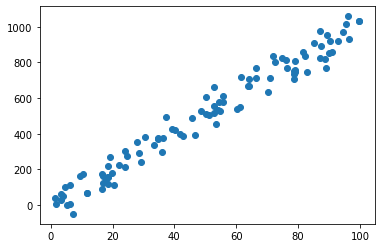

In [10]:
plt.scatter(X_1d[:, 0], y_1d)

In [11]:
reg_1d = LinearRegression()
reg_1d.fit(X_1d, y_1d)
y_1d_pred = reg_1d.predict(X_1d)

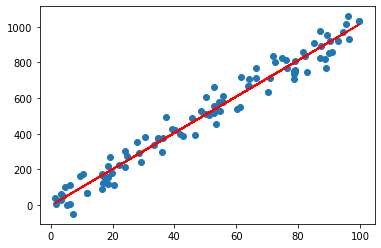

In [12]:
plt.scatter(X_1d[:, 0], y_1d)
plt.plot(X_1d[:, 0], y_1d_pred, c="red")

In [13]:
reg_1d.rsquared

0.9669739658319028